In [1]:
import numpy as np
import pylab as pl
import pandas as pd
pl.style.use('bmh')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
mta = np.load('MTA_Fare.npy')

In [4]:
#examining data 
print mta.shape
print mta

(600, 23, 194)
[[[56961 64703 68002 ..., 36527 33929 36824]
  [ 1732  2083  2107 ...,  1264  1172  1238]
  [  203   276   245 ...,   186   167   167]
  ..., 
  [    0     0     0 ...,     0     0     0]
  [    0     0     0 ...,     0     0     0]
  [   -1    -1    -1 ...,  1121  1377   712]]

 [[16210 20179 21769 ...,    -1    -1    -1]
  [  503   647   665 ...,    -1    -1    -1]
  [   41    43    44 ...,    -1    -1    -1]
  ..., 
  [    0     0     0 ...,    -1    -1    -1]
  [    0     0     0 ...,    -1    -1    -1]
  [   -1    -1    -1 ...,    -1    -1    -1]]

 [[ 3292  3429  3629 ...,  3746  3406  3217]
  [  110    92   102 ...,   212   209   211]
  [    7     6    13 ...,    26    20    22]
  ..., 
  [    0     0     0 ...,     0     0     0]
  [    0     0     0 ...,     0     0     0]
  [   -1    -1    -1 ...,   573   761   288]]

 ..., 
 [[   -1    -1    -1 ...,    -1    -1    -1]
  [   -1    -1    -1 ...,    -1    -1    -1]
  [   -1    -1    -1 ...,    -1    -1    -1]
  .

(600,23,194)

There are 600 Manhattan Stations, with 23 types of cards, over 194 weeks-05/21/2010 to 02/21/2014.

In [5]:
#Changing negative values to Nan
mta = np.where(mta<0, 'Nan', mta)

In [6]:
#After converting all negative numbers to Nan(strings), you need to tell python to make everything a number.
mta = mta.astype(float)

In [7]:
#checking to see if it worked
mta[:4]

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [8]:
#We only want Stations and weeks
mta_stations = np.nanmean(mta, axis=(0,1))
mta_stations

array([ 2628.91253444,  2885.62127785,  2906.06607108,  2885.09640683,
        2859.10736677,  2573.3031612 ,  2809.91516458,  2865.56926407,
        2827.78460632,  2807.73080699,  2791.56172353,  2736.18877351,
        2665.85542522,  2773.44953858,  2614.33914577,  2947.06027881,
        2963.26232083,  2852.15982721,  2951.95503632,  2857.80084248,
        2977.32849008,  2957.51293103,  2937.62470611,  2937.77575758,
        2951.50803292,  2459.86226784,  2853.29608993,  2989.32453568,
        2942.97077224,  2694.15610948,  2131.27790811,  2130.63225806,
        2686.52228739,  2650.2971652 ,  2542.90469208,  2583.94819159,
        2801.57116325,  2844.95826002,  2891.1659824 ,  2612.08093842,
        2852.41485826,  2886.3793442 ,  2933.49558217,  2907.27076803,
        2892.37460815,  2962.47202042,  2964.52729236,  2797.96691537,
        2850.52670332,  2984.32250147,  2950.83343172,  2947.01593861,
        2671.05637544,  2930.50373061,  2967.92453758,  2943.18338897,
      

In [16]:
#creating the date range that is mentioned 
time = pd.date_range('05/21/2010', periods=194, freq='w')

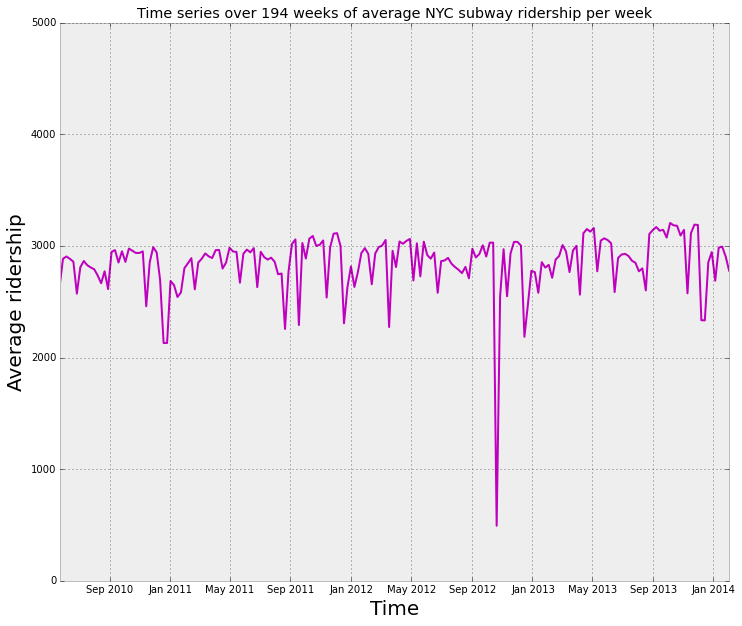

In [17]:
#plotting the rides against time

figure, ax = pl.subplots(figsize=(12,10))
ax.plot(time, np.transpose(mta_stations), color='m')
ax.set_ylim(0,5000)
ax.set_title('Time series over 194 weeks of average NYC subway ridership per week')
pl.xlabel('Time', fontsize=20)
pl.ylabel('Average ridership', fontsize=20)

In [11]:
#we only need to find the place where the lowest event happened. 
#we dont need places with high ridership
thresholds = np.nanmean(mta_stations) - 3*np.nanstd(mta_stations)
print thresholds

2040.9079119


In [12]:
#find event
events = np.where(mta_stations<thresholds)

In [13]:
print events

(array([126]),)


The Big event, which was hurricane Sandy, caused the average numbers of riders to decrease below 3 standard deviations of the mean.It happened on week 126.